In [1]:
from IJCAI19.module.cleverhans_model_v2 import AttackModel, Attacker, CleverhansModel
from IJCAI19.module.utils import * 
from cleverhans.attacks import MomentumIterativeMethod
%matplotlib inline
import numpy as np

Using TensorFlow backend.


In [2]:
batch_shape = (110, 224, 224, 3)
datag = dev_data_generater(batch_shape=batch_shape)
_,X,Y = next(datag)

In [3]:
name = 'inception_v1'
A = Attacker(batch_shape, 110, name=name)

INFO:tensorflow:Restoring parameters from ../official_data/model/inception_v1/inception_v1.ckpt
inception_v1 attack runs: 205.74 s
inception_v1 predict runs: 14.78 s
inception_v1 predict accuracy : 0.0
inception_v1 adv accuracy : 0.0, L2 23.62330119140932


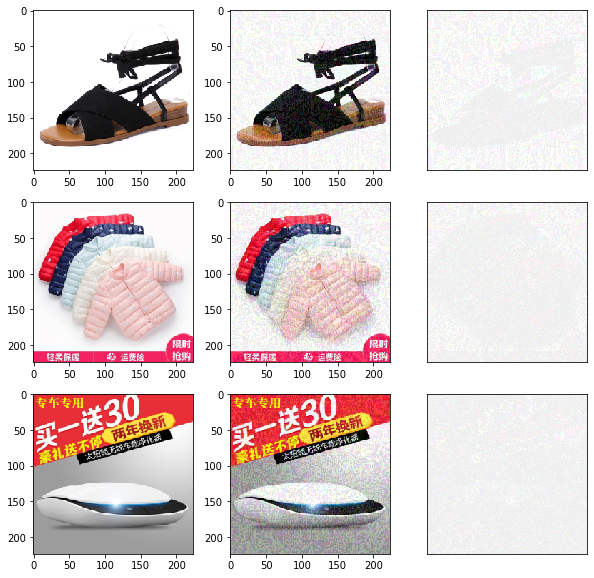

In [4]:
attack_params = {"eps":32.0 / 255.0,  "clip_min": None, "clip_max": None}
Xadv, _ = A.attack(X, Y, MomentumIterativeMethod, attack_params, None)
plot_images(X, Xadv, n=3)

In [6]:
name = 'resnetv1_50'
A = Attacker(batch_shape, 110, name=name)
A.predict(Xadv,Y)

INFO:tensorflow:Restoring parameters from ../official_data/model/resnet_v1_50/model.ckpt-49800
resnetv1_50 predict runs: 40.97 s
resnetv1_50 predict accuracy : 0.19090908765792847


(array([ 92,  79,  96,  64,  70,  18,  58,  75,  45,   3,  33,  45,   2,
         78,  36,  57,  30,  58, 108,  36,   9,  24, 102, 105, 103,  18,
         34,  18,  84,  93,  72,  30,  66,  62,  24,  28,  89,  64,   9,
         85,  78,   1,  70,  64,  33,  28,  72,  88,  23,  76,  59,  41,
         75,   0,  92,  26,  56,  18,  83,   9, 108,  89,  83,  65,   2,
        102,  65, 105,  62,  26,  86,  74,  93,  92,  94, 102,  18, 105,
        106,  99,  86,   2,  74,  22,   1, 102,  30,   0, 102,  64,  40,
        107,  79, 102,  85,  70,  62,  28,  68,  20,  56,   1, 104,  26,
         95, 102,   1,  33,  76,  64], dtype=int64), 0.19090909)

In [7]:
name = 'vgg_16'
A = Attacker(batch_shape, 110, name=name)
A.predict(Xadv,Y)

TypeError: vgg_16() got an unexpected keyword argument 'reuse'

In [ ]:
plot_images(X, Xadv, n=5)